In [1]:
###Statistical tests
#After finishing text mining,the next step is to examine whether particular content in media coverage influence its reach.
# In particular, the following tests will be taken:
#1. Mean comparison (ANOVA)

In [2]:
#Loading the data

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('Processed_1.csv')

In [5]:
data.columns

Index(['Unnamed: 0', 'Date', 'Headline', 'URL', 'Opening Text', 'Hit Sentence',
       'Source', 'Country', 'Reach', 'National Viewership', 'Engagement',
       'Sentiment', 'Alternate Date Format', 'Time', 'Social Echo Total',
       'Girl_in_Headline', 'Girl_in_Open', 'Girl_in_Hit', 'Boy_in_Headline',
       'Boy_in_Open', 'Boy_in_Hit', 'Women_in_Headline', 'Women_in_Open',
       'Women_in_Hit', 'Men_in_Headline', 'Men_in_Open', 'Men_in_Hit',
       'Female_in_Headline', 'Female_in_Hit', 'Female_in_Open', 'Female',
       'Male_in_Headline', 'Male_in_Hit', 'Male_in_Open', 'Male',
       'Problems_in_Headline', 'Problems_in_Open', 'Problems_in_Hit',
       'Problems', 'Solutions_in_Headline', 'Solutions_in_Open',
       'Solutions_in_Hit', 'Solutions', 'Activism_in_Hit',
       'Activism_in_Headline', 'Activism_in_Open', 'Activism',
       'Poverty_in_Open', 'Poverty_in_Hit', 'Poverty_in_Headline', 'Poverty',
       'Norm_in_Headline', 'Norm_in_Hit', 'Norm_in_Open', 'Norm',
       'D

In [6]:
#First let's look at the most general data
data1=data[['Date', 'Country', 'Reach', 'National Viewership', 'Engagement','Time', 'Social Echo Total','Female','Male', 'DRR', 'Norm', 'Activism', 'Problems',
       'Solutions', 'Poverty']]

In [7]:
data1.describe()

,Reach,National Viewership,Engagement,Social Echo Total,Female,Male,DRR,Norm,Activism,Problems,Solutions,Poverty
count,6.655400e+04,66554.0,66554.000000,66554.000000,66554.000000,66554.000000,66554.000000,66554.000000,66554.000000,66554.000000,66554.000000,66554.000000
mean,3.258713e+06,0.0,0.008189,11.958650,0.751856,0.091670,0.012486,0.005950,0.050786,0.143282,0.009586,0.032996
std,8.874540e+06,0.0,0.225110,578.384139,0.900359,0.358336,0.124321,0.084004,0.262569,0.403202,0.114851,0.207138
min,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.655000e+02,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.620000e+04,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.382966e+06,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.933907e+08,0.0,43.000000,139911.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [8]:
#View plots of each variables to see & identify outliers
#Import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

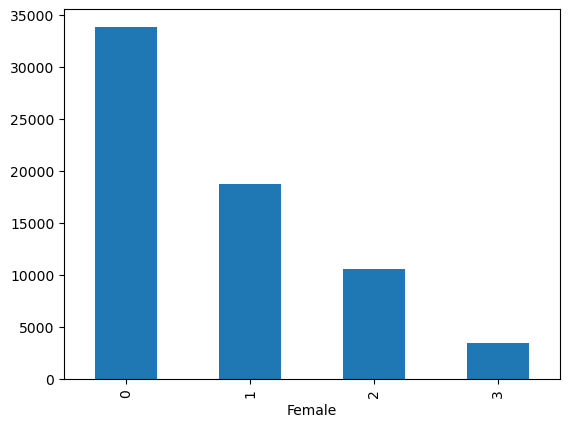

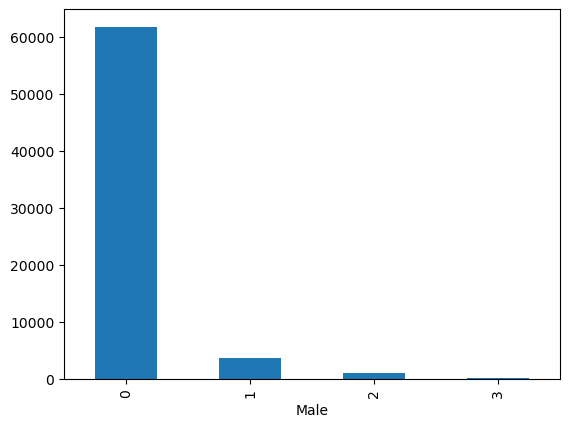

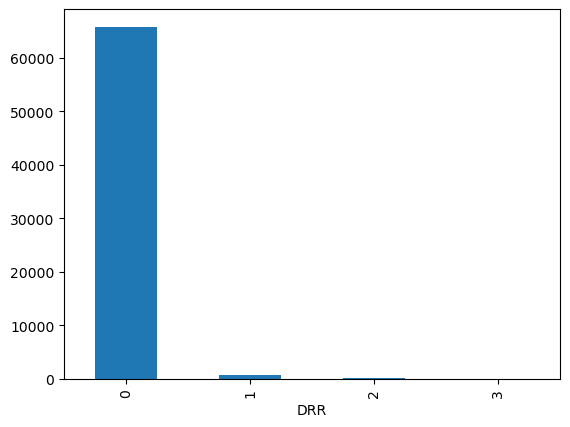

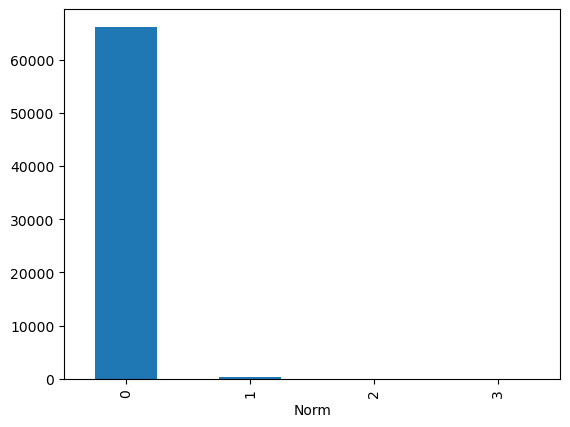

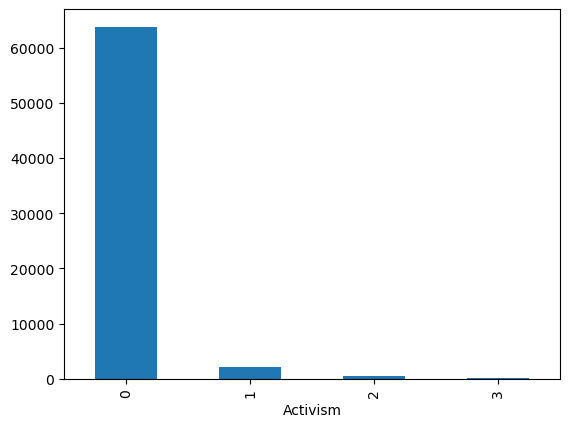

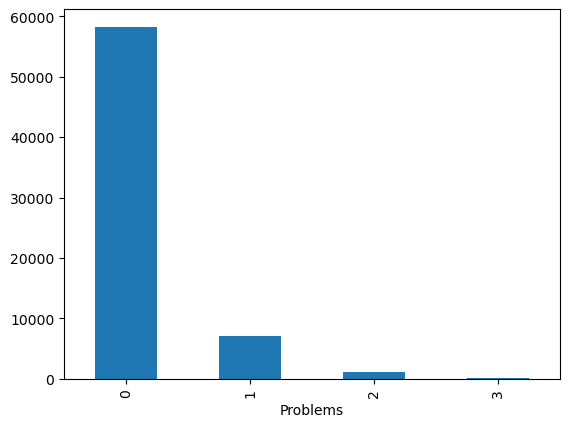

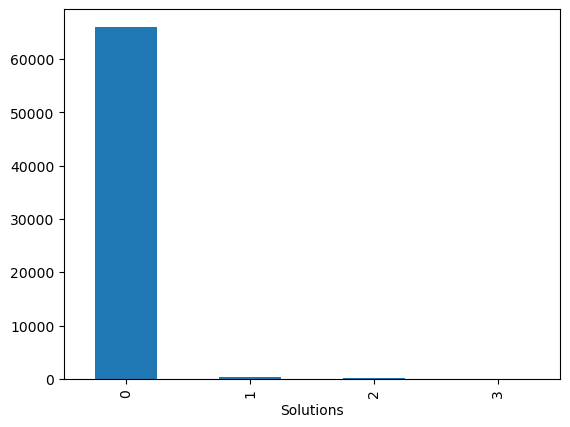

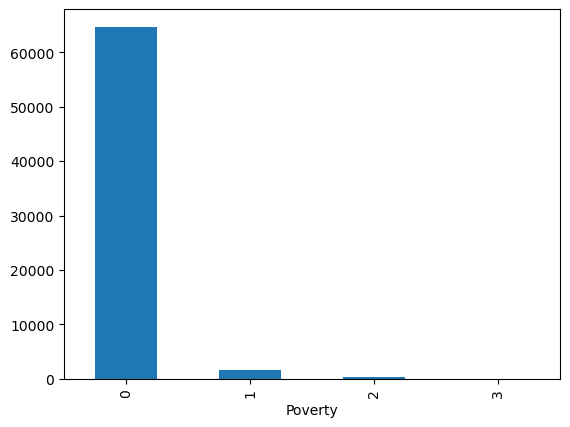

In [9]:
#Visualize all presence variable
presence_data = data[['Female','Male', 'DRR', 'Norm', 'Activism', 'Problems',
       'Solutions', 'Poverty']]
for column_name in presence_data:
    presence_data[column_name].value_counts().plot(kind='bar')
    plt.show()

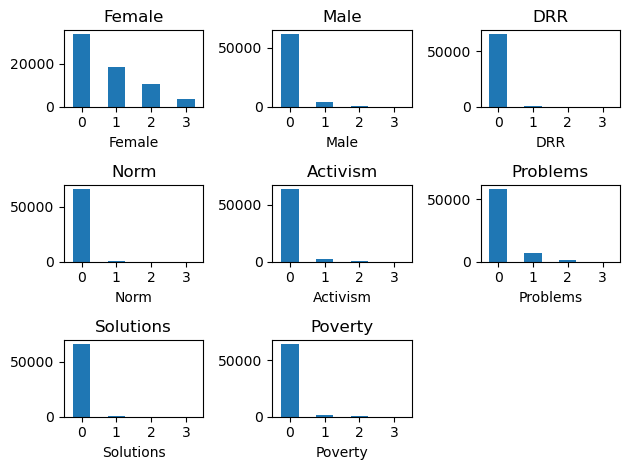

In [10]:
#Another way to arrange the graph
import math

size = math.ceil(presence_data.shape[1]** (1/2))
fig = plt.figure()

for i, col in enumerate(presence_data.columns):
    fig.add_subplot(size, size, i + 1)
    presence_data[col].value_counts().plot(kind="bar", ax=plt.gca(), title=col, rot=0)

fig.tight_layout()

In [11]:
#Create a new table for value counts of variables
s1 = pd.Series(data1[['Female']].value_counts(), name='Female')
s2 = pd.Series(data1[['Male']].value_counts(), name='Male')
s3 = pd.Series(data1[['DRR']].value_counts(), name='DRR')
s4 = pd. Series(data1[['Norm']].value_counts(), name='Norm')
s5 = pd.Series(data1[['Activism']].value_counts(), name='Activism')
s6 = pd.Series(data1[['Problems']].value_counts(), name='Problems')
s7 = pd.Series(data1[['Solutions']].value_counts(), name='Solutions')
s8 = pd.Series(data1[['Poverty']].value_counts(), name='Poverty')

In [12]:
data_2 = pd.concat([s1, s2,s3,s4,s5,s6,s7,s8], axis=1)

In [13]:
data_2

,Female,Male,DRR,Norm,Activism,Problems,Solutions,Poverty
0,33878,61790,65823,66192,63791,58267,66023,64694
1,18717,3592,635,332,2219,7114,440,1554
2,10555,1007,92,26,471,1097,75,276
3,3404,165,4,4,73,76,16,30


In [14]:
data2=data_2.transpose()

In [15]:
data2

,0,1,2,3
Female,33878,18717,10555,3404
Male,61790,3592,1007,165
DRR,65823,635,92,4
Norm,66192,332,26,4
Activism,63791,2219,471,73
Problems,58267,7114,1097,76
Solutions,66023,440,75,16
Poverty,64694,1554,276,30


<Axes: xlabel='Female'>

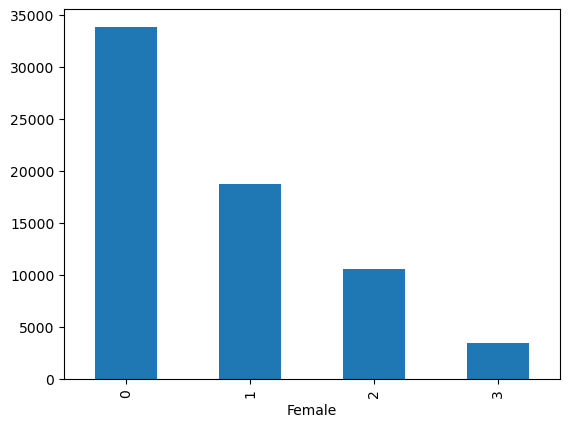

In [16]:
#Bar chart of female presence
data1['Female'].value_counts()[data1['Female'].unique()].plot(kind='bar')

<Axes: xlabel='Male'>

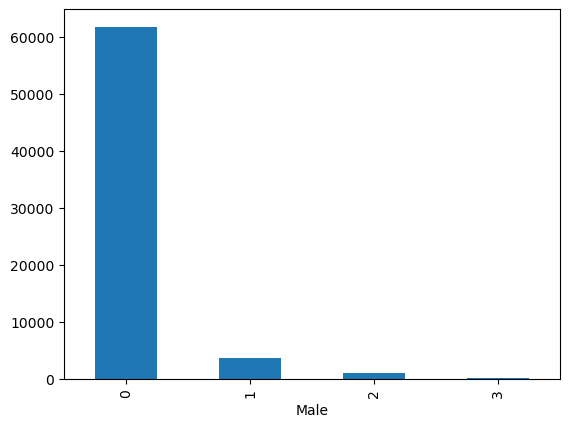

In [17]:
data1['Male'].value_counts()[data1['Male'].unique()].plot(kind='bar')

In [19]:
Female = data1['Female'].value_counts()
Female

Female
0    33878
1    18717
2    10555
3     3404
Name: count, dtype: int64

In [22]:
Female = Female.tolist()

In [24]:
Male = data1['Male'].value_counts()
Male = Male.tolist()

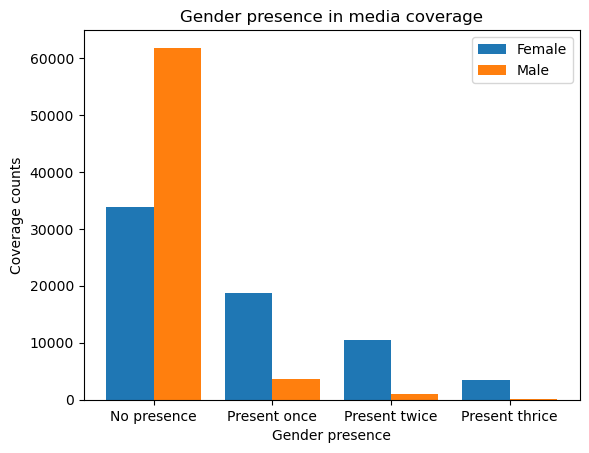

In [27]:
import numpy as np
import matplotlib.pyplot as plt

X = ["No presence", "Present once", "Present twice", "Present thrice"]

Female = data1['Female'].value_counts()
Female = Female.tolist()
Male = data1['Male'].value_counts()
Male = Male.tolist()

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Female, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, Male, 0.4, label = 'Male')

plt.xticks(X_axis, X)
plt.xlabel("Gender presence")
plt.ylabel("Coverage counts")
plt.title("Gender presence in media coverage")

plt.legend()
plt.show()

In [26]:
#We can see some apparent difference here, so let's do a mean comparison
from scipy.stats import f_oneway
f_oneway(data1['Female'],data1['Male'])

F_onewayResult(statistic=30889.973087375376, pvalue=0.0)

In [27]:
#the one-way ANOVA test with p-value <0.001 so it signifies that there is difference 

In [30]:
#Checking the influence of female presence on reach, engagement and social echo
#Desciption of the data
data1.groupby('Female', as_index=False)[['Reach', 'Engagement', 'Social Echo Total']].mean()

,Female,Reach,Engagement,Social Echo Total
0,0,3.533866e+06,0.007970,14.719228
1,1,2.827150e+06,0.011220,9.288561
2,2,2.990800e+06,0.004358,10.351682
3,3,3.723968e+06,0.005582,4.148649


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


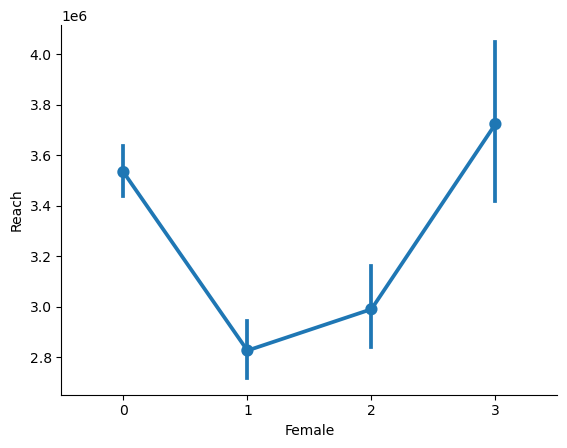

In [31]:
#Let's visualize the relation between Reach and female mention here
import seaborn as sns

fig = sns.pointplot(x='Female', y = 'Reach', data = data1)
sns.despine()

In [32]:
#let's do an ANOVA to see
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Reach ~ Female'

model = ols(formula, data=data1).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Female,1.495369e+15,1.0,18.992149,0.000013
Residual,5.240049e+18,66552.0,NaN,NaN


In [33]:
formula = 'Engagement ~ Female'

model = ols(formula, data=data1).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Female,0.047760,1.0,0.942492,0.331641
Residual,3372.489322,66552.0,NaN,NaN


In [34]:
#let's do another ANOVA to see
formula = 'Reach ~ Female+Male'

model = ols(formula, data=data1).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Female,3.376375e+15,1.0,43.039360,5.404134e-11
Male,1.922039e+16,1.0,245.006368,3.996027e-55
Residual,5.220829e+18,66551.0,NaN,NaN


In [35]:
#let's do another ANOVA to see how other variables differ in Reach

formula = 'Reach ~ DRR+Norm+Activism+Problems+Solutions+Poverty'

model = ols(formula, data=data1).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
DRR,9.209031e+13,1.0,1.170993,2.792013e-01
Norm,1.100937e+14,1.0,1.399918,2.367415e-01
Activism,1.250361e+14,1.0,1.589921,2.073418e-01
Problems,7.795457e+15,1.0,99.124691,2.461823e-23
Solutions,8.842250e+12,1.0,0.112435,7.373894e-01
Poverty,9.558835e+12,1.0,0.121547,7.273635e-01
Residual,5.233452e+18,66547.0,NaN,NaN


In [36]:
test1= ols('Reach ~ Female+Male+DRR+Norm+Activism+Problems+Solutions+Poverty', data=data1).fit()
print(test1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Reach   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     44.29
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.71e-71
Time:                        21:37:36   Log-Likelihood:            -1.1590e+06
No. Observations:               66554   AIC:                         2.318e+06
Df Residuals:                   66545   BIC:                         2.318e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.412e+06    4.8e+04     71.155      0.0

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(data1['Female'], data1['Male'], data1['DRR'], data1['Norm', data1['Activism'], data1['Problems'], data1['Solutions'], data1['Poverty'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=data1_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)
                sum_sq    df         F    PR(>F)
C(treatments)  3010.95   3.0  17.49281  0.000026
Residual        918.00  16.0       NaN       NaN

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=data1_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary
# output (ANOVA F and p value)
                 df   sum_sq   mean_sq         F    PR(>F)
C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
Residual       16.0   918.00    57.375       NaN       NaN

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.


In [ ]:
#From ANOVA analysis, we know that treatment differences are statistically significant, 
#but ANOVA does not tell which treatments are significantly different from each other. 
#To know the pairs of significant different treatments, we will perform multiple pairwise 
#comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly 
#significantly differenced (HSD) test.

In [ ]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=data1_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

# Note: p-value 0.001 from tukey_hsd output should be interpreted as <=0.001

In [36]:
##1. Normality test

In [24]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(data1['Poverty'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.146, p=0.000
Probably not Gaussian


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [26]:

# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
stat, p = normaltest(data1['Problems'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=41187.968, p=0.000
Probably not Gaussian


In [30]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
result = anderson(data1['Female'])
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < cv:
     print('Probably Gaussian at the %.1f%% level' % (sl))
 else:
     print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=6180.594
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [32]:
#2 Correlation tests

In [34]:

# Example of the Pearson's Correlation test
# Is there corellation between Problems and Solutions
from scipy.stats import pearsonr
stat, p = pearsonr(data1['Problems'], data1['Solutions'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.041, p=0.000
Probably dependent


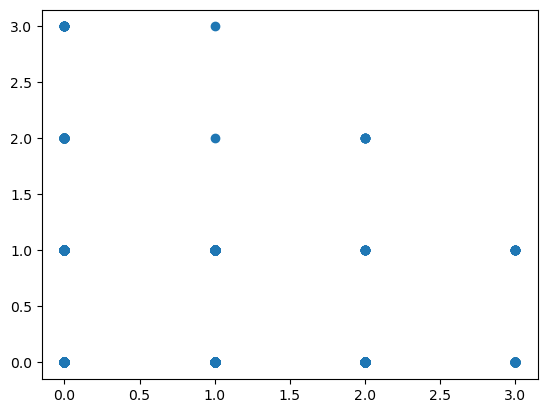